    Описание задания
А/А-тестирование мобильного приложения. Необходимо посчитать результаты A/A-теста, проверяя метрику качества FPR (будем проверять на конверсии в покупку). Известно, что сплит-система сломана. Требуется проверить утверждение о поломке и найти ее причины, если сплит-система действительно сломана

 

Описание колонок
experimentVariant – вариант эксперимента
version – версия приложения
purchase – факт покупки
 

Задача
Запустите A/A-тест
Посчитайте FPR на уровне альфа = 0.05 (ставьте подвыборки без возвращения объемом 1000). Вы увидите, что FPR > альфа! Нам нужно наоборот – чтобы было меньше.
Найдите причины поломки сплит-системы, ориентируясь на результаты эксперимента (подсказка: найдите аномалию в версии приложения)
Напишите выводы, которые можно сделать на основе анализа результатов A/A-теста
 



In [64]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

from tqdm.auto import tqdm

In [77]:
file_path = '/home/jupyter-i-petrov/10_statistica/hw_aa.csv'
df = pd.read_csv(file_path, sep=';')

In [50]:
df.dtypes

Unnamed: 0            int64
uid                  object
experimentVariant     int64
version              object
purchase              int64
dtype: object

In [41]:
df.version.value_counts()

v2.8.0      82835
v2.9.0      23954
v3.8.0.0    11804
v3.7.4.0     8425
Name: version, dtype: int64

In [42]:
df.experimentVariant.value_counts()

1    63916
0    63102
Name: experimentVariant, dtype: int64

In [43]:
df.purchase.value_counts()

0    122104
1      4914
Name: purchase, dtype: int64

In [45]:
df.head()

,Unnamed: 0,uid,experimentVariant,version,purchase
0,1,c4ca4238a0b923820dcc509a6f75849b,1,v2.8.0,0
1,2,c81e728d9d4c2f636f067f89cc14862c,0,v2.9.0,0
2,3,eccbc87e4b5ce2fe28308fd9f2a7baf3,1,v2.9.0,0
3,4,a87ff679a2f3e71d9181a67b7542122c,1,v2.8.0,0
4,5,e4da3b7fbbce2345d7772b0674a318d5,1,v2.8.0,0


In [ ]:
df[df.experimentVariant == 1]['purchase']
df[df.experimentVariant == 0]['purchase']

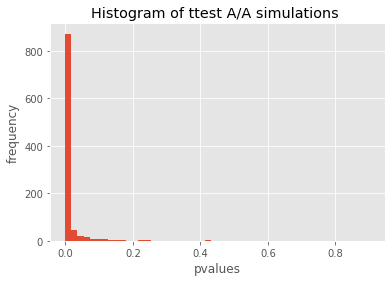

0.934

In [78]:
n = 100000
simulations = 1000
n_s = 1000
res = []

# Запуск симуляций A/A теста
for i in tqdm(range(simulations)):
    s1 = df[df.experimentVariant == 1]['purchase'].sample(n_s, replace = False).values
    s2 = df[df.experimentVariant == 0]['purchase'].sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations

In [ ]:
#0.934>0.05  FPR не сошелся -> A/A-тест не сходится

In [88]:
df.groupby(['experimentVariant', 'version'], as_index = False).purchase.mean()

,experimentVariant,version,purchase
0,0,v2.8.0,0.000993
1,0,v2.9.0,0.074658
2,0,v3.7.4.0,0.059943
3,0,v3.8.0.0,0.057604
4,1,v2.8.0,0.045606
5,1,v2.9.0,0.071304
6,1,v3.7.4.0,0.063018
7,1,v3.8.0.0,0.062848


In [92]:
df.query("purchase == 1") \
    .groupby(['experimentVariant'], as_index=False) \
    .aggregate({'purchase': 'sum'})

,experimentVariant,purchase
0,0,1511
1,1,3403


In [96]:
df.purchase.sum()

4914

In [108]:
(df.query("purchase == 1").aggregate({'purchase': 'count'}))/(df.query("purchase == 0").aggregate({'purchase': 'count'}))

purchase    0.040244
dtype: float64

In [100]:
df.query("experimentVariant == 1").groupby(['version'], as_index=False).aggregate({'purchase': 'count'})

,version,purchase
0,v2.8.0,41552
1,v2.9.0,12033
2,v3.7.4.0,4221
3,v3.8.0.0,6110


In [103]:
df.query("experimentVariant == 0").groupby(['version'], as_index=False).aggregate({'purchase': 'count'})

,version,purchase
0,v2.8.0,41283
1,v2.9.0,11921
2,v3.7.4.0,4204
3,v3.8.0.0,5694


In [109]:
df.groupby(['experimentVariant', 'version'], as_index = False).purchase.mean()

,experimentVariant,version,purchase
0,0,v2.8.0,0.000993
1,0,v2.9.0,0.074658
2,0,v3.7.4.0,0.059943
3,0,v3.8.0.0,0.057604
4,1,v2.8.0,0.045606
5,1,v2.9.0,0.071304
6,1,v3.7.4.0,0.063018
7,1,v3.8.0.0,0.062848


In [110]:
#пользователей в каждой группе
df.groupby(['experimentVariant', 'version'], as_index = False).aggregate({'purchase': 'mean', 'Unnamed: 0' : 'count'})

,experimentVariant,version,purchase,Unnamed: 0
0,0,v2.8.0,0.000993,41283
1,0,v2.9.0,0.074658,11921
2,0,v3.7.4.0,0.059943,4204
3,0,v3.8.0.0,0.057604,5694
4,1,v2.8.0,0.045606,41552
5,1,v2.9.0,0.071304,12033
6,1,v3.7.4.0,0.063018,4221
7,1,v3.8.0.0,0.062848,6110


In [127]:
df[(df.experimentVariant == 1) & (df.version!= '3.8.0.0')]['purchase']

0         0
2         0
3         0
4         0
5         0
         ..
127009    0
127010    0
127015    0
127016    0
127017    0
Name: purchase, Length: 63916, dtype: int64

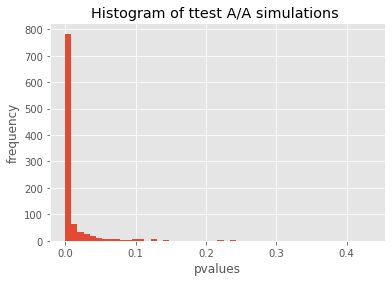

0.937

In [122]:
n = 100000
simulations = 1000
n_s = 1000
res = []


# Запуск симуляций A/A теста
for i in tqdm(range(simulations)):
    s1 = df[(df.experimentVariant == 1) & (df.version!= '3.8.0.0')]['purchase'].sample(n_s, replace = False).values
    s2 = df[(df.experimentVariant == 0) & (df.version!= '3.8.0.0')]['purchase'].sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations

In [126]:
df[(df.experimentVariant == 1) & (df.version!= 'v3.7.4.0')]['purchase']

0         0
2         0
3         0
4         0
5         0
         ..
127009    0
127010    0
127015    0
127016    0
127017    0
Name: purchase, Length: 59695, dtype: int64

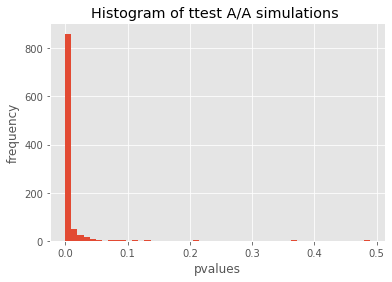

0.962

In [123]:
n = 100000
simulations = 1000
n_s = 1000
res = []


# Запуск симуляций A/A теста
for i in tqdm(range(simulations)):
    s1 = df[(df.experimentVariant == 1) & (df.version!= 'v3.7.4.0')]['purchase'].sample(n_s, replace = False).values
    s2 = df[(df.experimentVariant == 0) & (df.version!= 'v3.7.4.0')]['purchase'].sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations

In [125]:
df[(df.experimentVariant == 1) & (df.version!= 'v2.9.0')]['purchase']

0         0
3         0
4         0
5         0
7         0
         ..
127005    0
127009    0
127010    0
127016    0
127017    0
Name: purchase, Length: 51883, dtype: int64

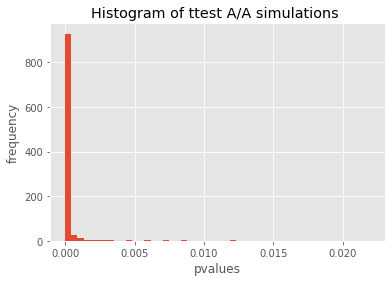

1.0

In [124]:
n = 100000
simulations = 1000
n_s = 1000
res = []


# Запуск симуляций A/A теста
for i in tqdm(range(simulations)):
    s1 = df[(df.experimentVariant == 1) & (df.version!= 'v2.9.0')]['purchase'].sample(n_s, replace = False).values
    s2 = df[(df.experimentVariant == 0) & (df.version!= 'v2.9.0')]['purchase'].sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations

In [112]:
df[(df.experimentVariant == 1) & (df.version!= 'v2.8.0')]['purchase']

2         0
10        0
13        0
15        0
34        1
         ..
126977    0
126985    0
126991    0
127003    0
127015    0
Name: purchase, Length: 22364, dtype: int64

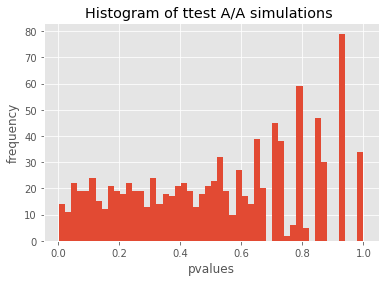

0.032

In [116]:
n = 100000
simulations = 1000
n_s = 1000
res = []


# Запуск симуляций A/A теста
for i in tqdm(range(simulations)):
    s1 = df[(df.experimentVariant == 1) & (df.version!= 'v2.8.0')]['purchase'].sample(n_s, replace = False).values
    s2 = df[(df.experimentVariant == 0) & (df.version!= 'v2.8.0')]['purchase'].sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations

In [ ]:
# различие для версии 'v2.8.0' мешало 